
# Project1: Data Science Blog Post (Boston Airbnb Open Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Business understanding">Business understanding</a></li>
<li><a href="#Data understanding">Data understanding</a></li>
<li><a href="#Data preparation">Data preparation</a></li>
<li><a href="#Modeling">Data Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Evaluation ">Evaluation</a></li>

</ul>

<a id='intro'></a>
# Introduction

Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.
This project is the first project of data sciences Udacity's Nanodegree program.
In this project, we will follow the CRISP-DM process (Cross Industry Process for Data Mining). CRISP-DM stands for:


- Business understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment

<a id='Business understanding'></a>

# Business understanding

In this project, I will focus to find out:

- The significant factors affect booking price.
- The most month attract the tourists.
- The most month have lower prices.
- The significant factors affect customer' reviews. 


<a id='Data understanding'></a>

# Data understanding

**Importing Packages required**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

**Loading Data**

In [2]:
Boston_r=pd.read_csv(r'.\boston\reviews.csv')
Boston_c=pd.read_csv(r'.\boston\calendar.csv')
Boston_l=pd.read_csv(r'.\boston\listings.csv')

**Exploring Data**

First see how data look

In [3]:
Boston_r.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
Boston_c.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
Boston_l.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

Second get column' names and attribute details

In [6]:
Boston_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [7]:
Boston_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [8]:
Boston_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

Third Check the statistical distribution for Numerical columns

In [9]:
Boston_r.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,6.827500e+04,6.827500e+04,68275,6.827500e+04,68275,68222
unique,NaN,NaN,2045,NaN,14775,67311
top,NaN,NaN,2016-04-19,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,342,NaN,654,112
mean,4.759910e+06,5.246516e+07,NaN,2.802389e+07,NaN,NaN
std,3.788990e+06,2.790991e+07,NaN,2.234097e+07,NaN,NaN
min,3.353000e+03,1.021000e+03,NaN,1.430000e+02,NaN,NaN
25%,1.458081e+06,3.010420e+07,NaN,9.001346e+06,NaN,NaN
50%,4.080000e+06,5.223121e+07,NaN,2.305179e+07,NaN,NaN
75%,7.377034e+06,7.663248e+07,NaN,4.213454e+07,NaN,NaN


In [10]:
Boston_c.describe(include='all')

,listing_id,date,available,price
count,1.308890e+06,1308890,1308890,643037
unique,NaN,365,2,1246
top,NaN,2017-02-18,f,$150.00
freq,NaN,3586,665853,20752
mean,8.442118e+06,NaN,NaN,NaN
std,4.500149e+06,NaN,NaN,NaN
min,3.353000e+03,NaN,NaN,NaN
25%,4.679319e+06,NaN,NaN,NaN
50%,8.578710e+06,NaN,NaN,NaN
75%,1.279603e+07,NaN,NaN,NaN


In [11]:
Boston_l.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3585,3.585000e+03,3585,3585,3442,2528,3585,3585,2170,1610,2295,2096,2031,2393,2986,2986,3585,2986,3.585000e+03,3585,3585,3585,3574,2276,3114,3114,3114,3585,3585,3585,3246,3585.000000,3585.000000,3585,3585,3585,3585,3042,3585,0.0,3583,3585,3547,3571,3585,3585,3585,3585.000000,3585.000000,3585,3582,3585,3585.000000,3571.000000,3575.000000,3576.000000,3585,3585,56.000000,3585,892,888,1342,2478,3585.000000,3585,3585.000000,3.585000e+03,3585,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585,3585.000000,2829,2829,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,3585,0.0,0.0,3585,3585,3585,3585,3585.000000,2829.000000
unique,NaN,3585,NaN,1,3504,3113,2268,3423,1,1728,1269,1859,1762,1617,1928,2986,2986,3585,2986,NaN,2181,1334,1281,176,1240,4,52,72,2,2174,2174,53,NaN,NaN,83,2,2,1239,30,25,NaN,38,1,43,4,39,1,1,NaN,NaN,2,13,3,NaN,NaN,NaN,NaN,5,3092,NaN,324,243,288,54,79,NaN,51,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,1,NaN,975,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,4,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/6646604,NaN,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,"The unit is stylishly designed for comfort, va...",none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...","You have access to the entire apartment, and a...",Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/b92abac1-4...,https://a0.muscache.com/im/pictures/57426369/0...,https://a2.muscache.com/im/pictures/a6bfa5d3-2...,https://a1.muscache.com/im/pictures/81422858/8...,NaN,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30,"Boston, Massachusetts, United States",ABOUT US:\r\n\r\nSeamlessTransition is a full-...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Allston-Brighton,NaN,NaN,"['email', 'phone', 'reviews', 'jumio']",t,t,"Boylston Street, Boston, MA 02215, United States",Allston-Brighton,Jamaica Plain,NaN,Boston,MA,02116,Boston,"Boston, MA",US,United States,NaN,NaN,t,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,$150.00,"$1,000.00","$3,500.00",$100.00,$100.00,NaN,$0.00,NaN,NaN,today,NaN,NaN,NaN,NaN,NaN,2016-09-06,NaN,2016-04-05,2016-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3585,8,21,17,7,3585,21,44,26,48,58,44

Fourth see the size and type of data

In [12]:
Boston_r.shape

(68275, 6)

In [13]:
Boston_r.dtypes.value_counts()

int64     3
object    3
dtype: int64

In [14]:
Boston_c.shape

(1308890, 4)

In [15]:
Boston_c.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [16]:
Boston_l.shape

(3585, 95)

In [17]:
Boston_l.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

<a id='Data preparation'></a>
## Data preparation

**In this section of the report, we will check for cleanliness,we will  trim and clean our dataset for analysis.**
### drop rows with missing values

In [18]:
#Function for showing columns with missing values
def show_missing_values(df):
    missing_vals = df.isnull().sum().sort_values(ascending = False)
    
    return missing_vals.iloc[missing_vals.nonzero()[0]]

In [19]:
show_missing_values(Boston_r)

C:\Users\Essam\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """


comments    53
dtype: int64

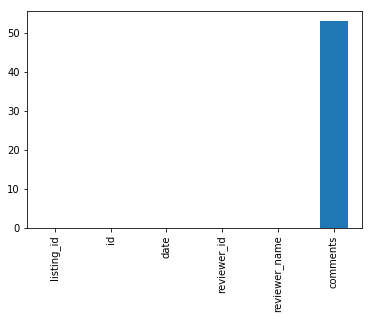

In [20]:
Boston_r.isnull().sum().plot(kind='bar')

In [21]:
show_missing_values(Boston_c)

C:\Users\Essam\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """


price    665853
dtype: int64

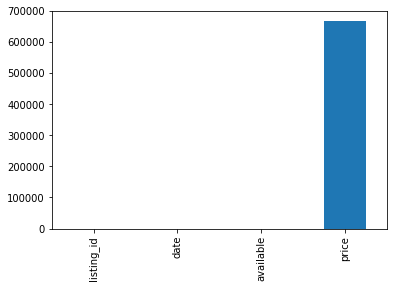

In [22]:
Boston_c.isnull().sum().plot(kind='bar')

In [23]:
show_missing_values(Boston_l)

C:\Users\Essam\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """


neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
review_scores_checkin            820
review_scores_cleanliness        818
review_scores_communication      818
review_scores_rating             813
reviews_per_month                756
first_review                     756
last_review                      756
t

C:\Users\Essam\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


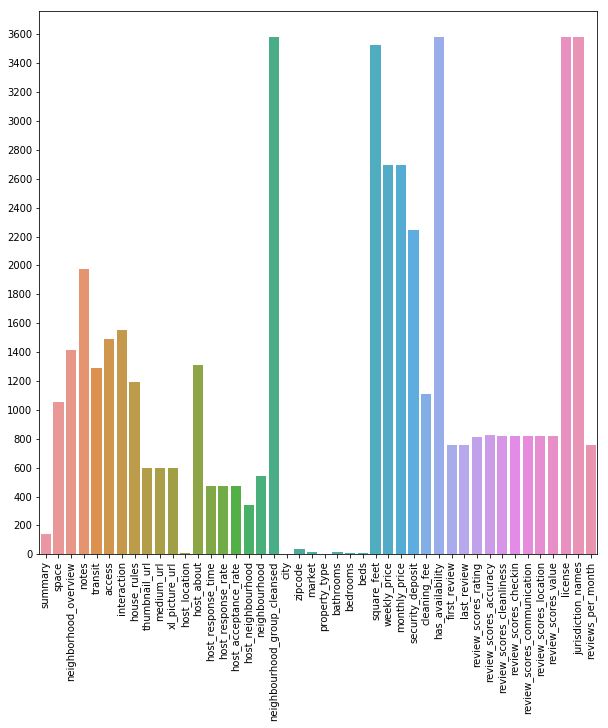

In [24]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4000,200))
sns.barplot(x=Boston_l.isnull().sum()[Boston_l.isnull().sum().nonzero()[0]].index,y=Boston_l.isnull().sum()[Boston_l.isnull().sum().nonzero()[0]].values)

**Removing null values**

We can see that in Boston_r and Boston_c, there are one row which has most missing values. Therefore, we will delete the entire 
rows. 

In [25]:
Boston_r.dropna(axis=0,subset=['comments'],inplace=True)
Boston_c.dropna(axis=0,subset=['price'],inplace=True)

In order to more differentiate among id columns in the three datasets, we will rename id column in Boston_l to Boston_l_id

In [26]:
Boston_l=Boston_l.rename(columns={'id':'listing_id'})

**Data Cleaning for first factor "Booking Price"**

In [27]:
Boston_l.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, Un

Now we will rename Boston_l and Boston_c column to be compatible and clean

In [28]:
Boston_l['monthly_price'] = pd.to_numeric(Boston_l['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
Boston_l['price'] = pd.to_numeric(Boston_l['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
Boston_l['weekly_price'] = pd.to_numeric(Boston_l['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
Boston_l['security_deposit'] = pd.to_numeric(Boston_l['security_deposit'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
Boston_l['cleaning_fee'] = pd.to_numeric(Boston_l['cleaning_fee'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
Boston_l['extra_people'] = pd.to_numeric(Boston_l['extra_people'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
Boston_l['host_response_rate'] = pd.to_numeric(Boston_l['host_response_rate'].apply(lambda x: str(x).replace('%', ''))
                                        ,errors='coerce')

In [29]:
Boston_l['host_since']=pd.to_datetime(Boston_l['host_since'])
Boston_l['month']=Boston_l.host_since.dt.month
Boston_l['year']=Boston_l.host_since.dt.year

In [30]:
Boston_cl=Boston_l.merge(Boston_c,on='listing_id')

In [31]:
Boston_c['date']=pd.to_datetime(Boston_c['date'])
Boston_c['month']=Boston_c.date.dt.month
Boston_c['year']=Boston_c.date.dt.year

In [32]:
Boston_c['price'] = pd.to_numeric(Boston_c['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')

In [33]:
Boston_l2=Boston_l._get_numeric_data()
Boston_l2.head()

,listing_id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month,month,year
0,12147973,20160906204935,31303940,NaN,1,1,NaN,42.282619,-71.133068,4,1.5,2.0,3.0,NaN,250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,2015
1,3075044,20160906204935,2572247,100.0,1,1,NaN,42.286241,-71.134374,2,1.0,1.0,1.0,NaN,65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,NaN,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,1,1.30,6,2012
2,6976,20160906204935,16701,100.0,1,1,NaN,42.292438,-71.135765,2,1.0,1.0,1.0,NaN,65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,NaN,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,NaN,NaN,1,0.47,5,2009
3,1436513,20160906204935,6031442,100.0,1,1,NaN,42.281106,-71.121021,4,1.0,1.0,2.0,NaN,75.0,NaN,NaN,100.0,50.0,2,25.0,1,1125,NaN,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,1,1.00,4,2013
4,7651065,20160906204935,15396970,100.0,1,1,NaN,42.284512,-71.136258,2,1.5,1.0,2.0,NaN,79.0,NaN,NaN,NaN,15.0,1,0.0,2,31,NaN,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,NaN,1,2.25,5,2014


### Question 1:

**What are the significant factors that affect booking price?**

Find the distribution of the prices

(array([3.058e+03, 4.670e+02, 4.400e+01, 6.000e+00, 5.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10.,  276.,  542.,  808., 1074., 1340., 1606., 1872., 2138.,
        2404., 2670., 2936., 3202., 3468., 3734., 4000.]),
 <a list of 15 Patch objects>)

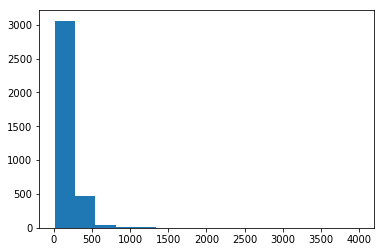

In [34]:
plt.hist(Boston_l['price'],bins=15)

We found that most distribution of the prices between 0 - 500 dollars

Find the distribution of the location

In [35]:
Boston_l['neighbourhood_cleansed'].value_counts().head(15)

Jamaica Plain    343
South End        326
Back Bay         302
Fenway           290
Dorchester       269
Allston          260
Beacon Hill      194
Brighton         185
South Boston     174
Downtown         172
East Boston      150
Roxbury          144
North End        143
Mission Hill     124
Charlestown      111
Name: neighbourhood_cleansed, dtype: int64

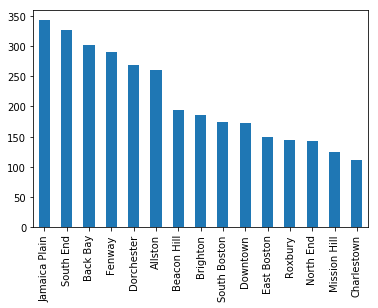

In [36]:
Boston_l['neighbourhood_cleansed'].value_counts().head(15).plot(kind='bar')

Relationship among neighbourhood with price, room type ,property type

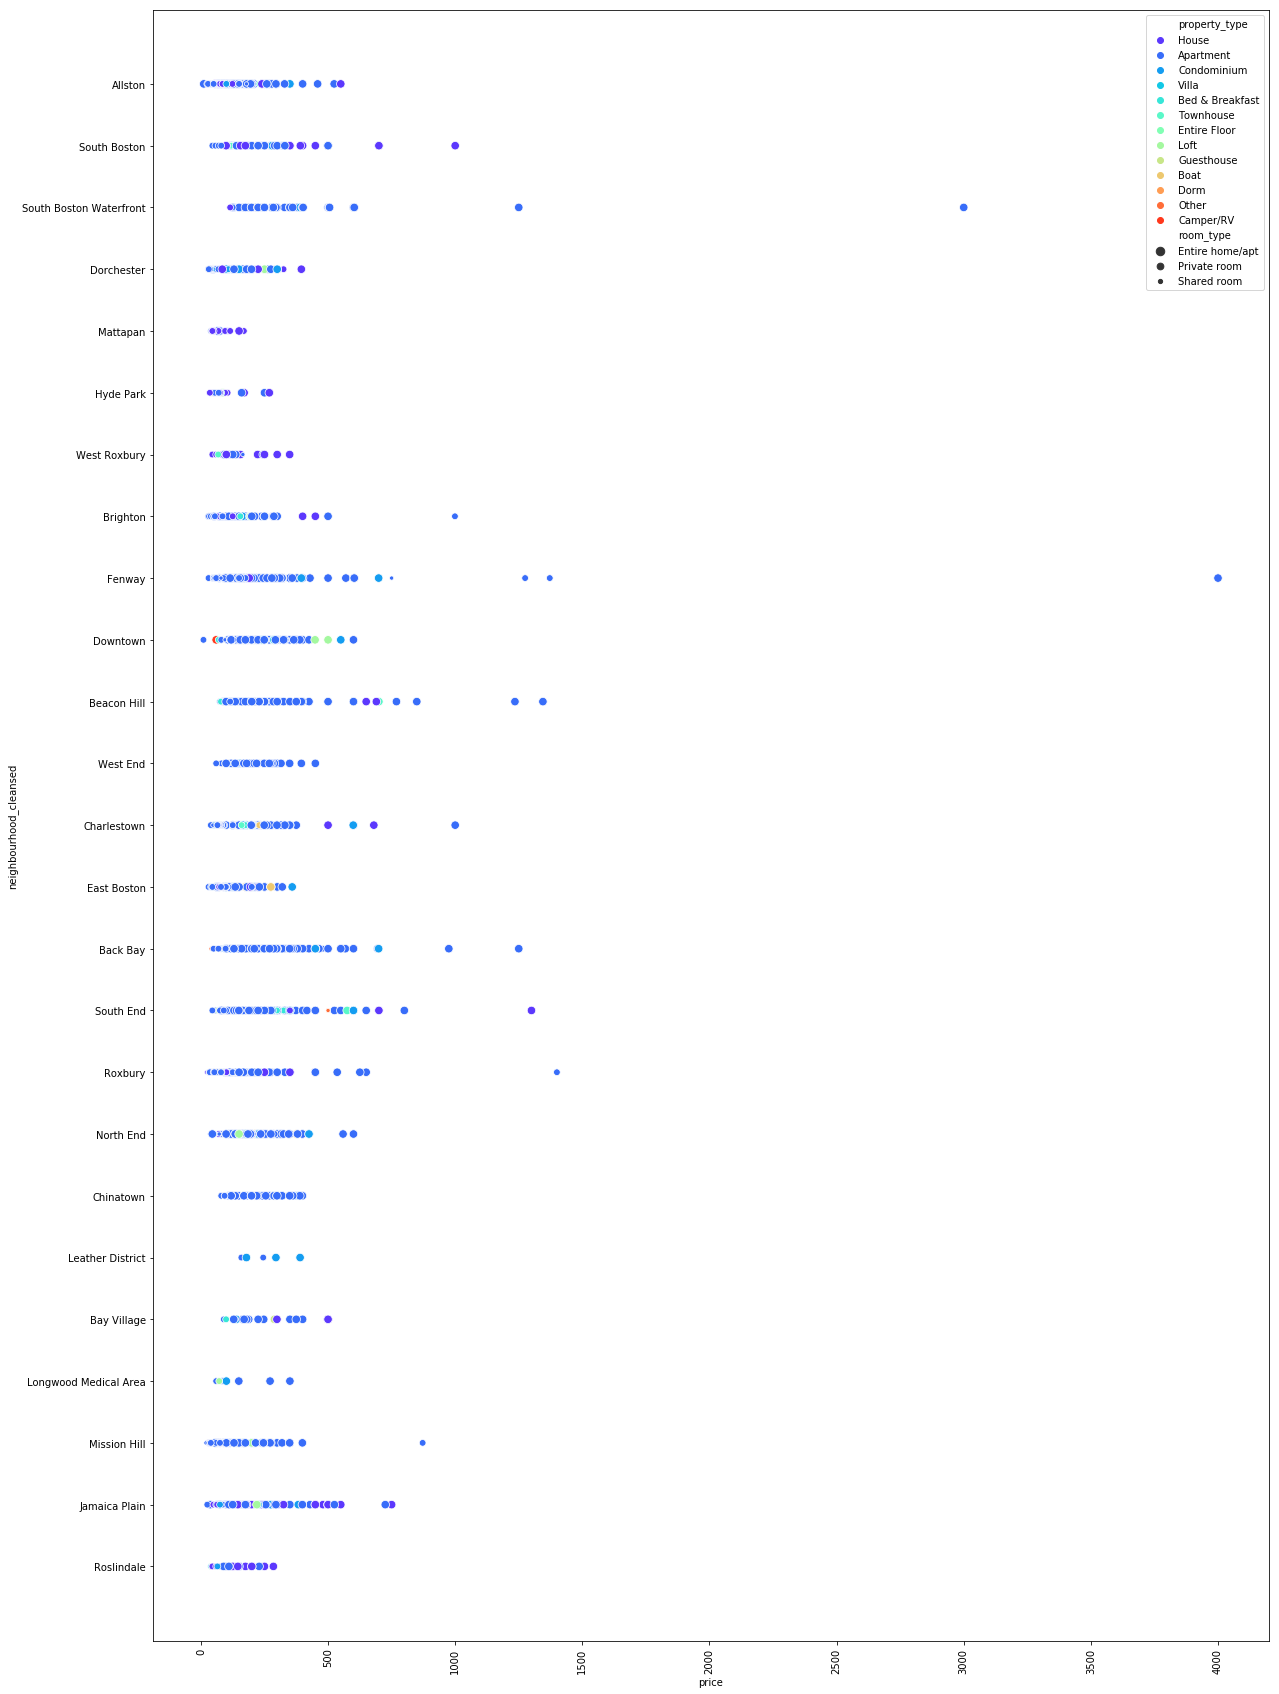

In [37]:
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.scatterplot(y='neighbourhood_cleansed',x='price',size='room_type',hue='property_type',palette='rainbow',data=Boston_l)

We found that most distribution of the property type are House and apartment

Find the distribution of the host location

In [38]:
Boston_l['host_location'].value_counts().head(20)

Boston, Massachusetts, United States              2421
US                                                 521
New York, New York, United States                  113
Montreal, Quebec, Canada                            59
Middlesex County, Massachusetts, United States      50
Cambridge, Massachusetts, United States             42
Massachusetts, United States                        28
Spokane, Washington, United States                  25
Brookline, Massachusetts, United States             19
Somerville, Massachusetts, United States            17
Milton, Massachusetts, United States                10
Medford, Massachusetts, United States               10
San Francisco, California, United States             7
Newton, Massachusetts, United States                 6
United States                                        6
Cohasset, Massachusetts, United States               6
Santa Monica, California, United States              6
Jersey City, New Jersey, United States               5
Paris, Île

We found that most distribution of the host location is Boston, Massachusetts, United States  

Find the distribution of the host response rate

In [39]:
Boston_l['host_response_rate'].value_counts()

100.0    2072
98.0      195
90.0      106
96.0       90
89.0       87
71.0       62
99.0       52
80.0       38
92.0       38
97.0       36
94.0       28
70.0       23
95.0       22
50.0       21
93.0       18
79.0       18
91.0       17
77.0       17
73.0       16
60.0       15
67.0       15
75.0       14
0.0        13
86.0       11
78.0       10
83.0       10
81.0        8
69.0        7
85.0        7
88.0        6
33.0        6
40.0        5
36.0        3
30.0        3
82.0        3
61.0        2
14.0        2
31.0        2
84.0        2
10.0        2
25.0        1
57.0        1
43.0        1
63.0        1
20.0        1
56.0        1
68.0        1
17.0        1
38.0        1
64.0        1
19.0        1
6.0         1
Name: host_response_rate, dtype: int64

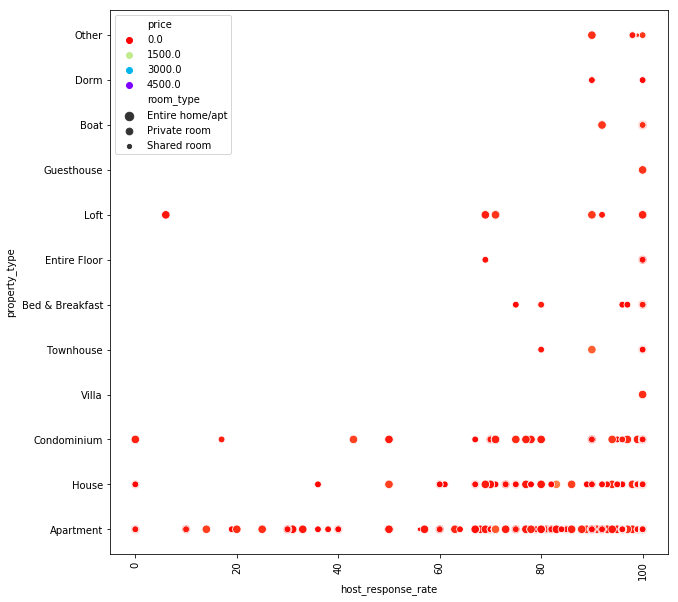

In [40]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_rate',hue='price',size='room_type',y='property_type',palette='rainbow_r',data=Boston_l)

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,105,5))
sns.scatterplot(y='host_response_rate',x='price',size='room_type',hue='property_type',palette='rainbow_r',data=Boston_l)

We found that most distribution of the response rate are House and apartment

Find the distribution between property type and room type

In [41]:
Boston_l['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

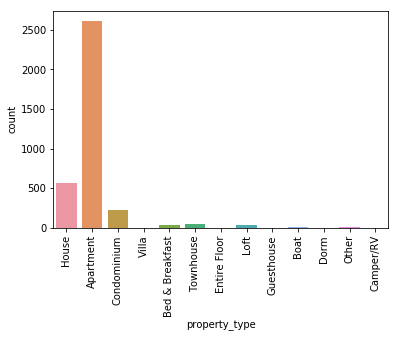

In [42]:
plt.xticks(rotation=90)
sns.countplot(Boston_l['property_type'])

In [43]:
Boston_l['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

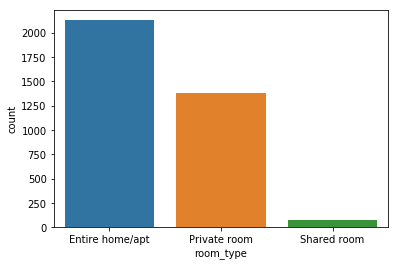

In [44]:
sns.countplot(Boston_l['room_type'])

We found that most distribution of the property type are apartment then house, room type Entire home / apt

Find the distribution of Review's of listings

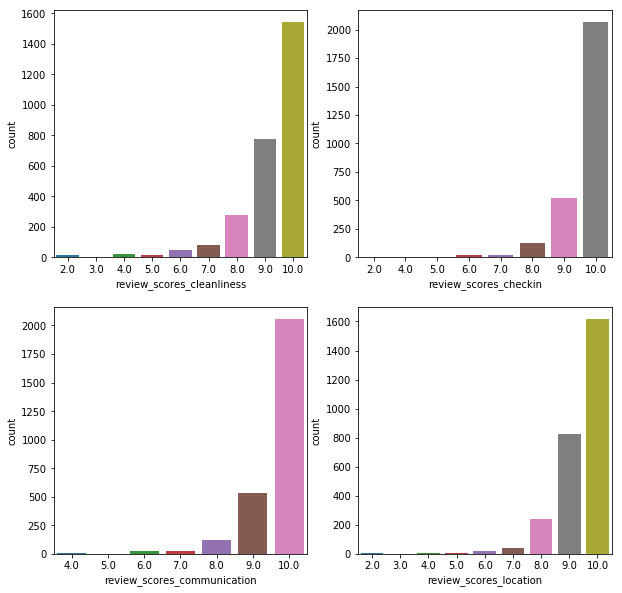

In [45]:
fig,axes= plt.subplots(nrows=2, ncols= 2,figsize=(10,10))



sns.countplot(Boston_l['review_scores_cleanliness'],ax=axes[0][0])

sns.countplot(Boston_l['review_scores_checkin'],ax=axes[0][1])

sns.countplot(Boston_l['review_scores_communication'],ax=axes[1][0])

sns.countplot(Boston_l['review_scores_location'],ax=axes[1][1])

We found that most distribution of reviews between 9-10

Find the distribution of Superhost

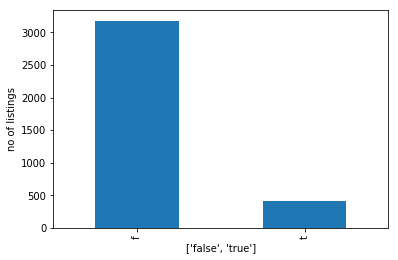

In [46]:
plt.xlabel(['false','true'])

plt.ylabel('no of listings')

Boston_l['host_is_superhost'].value_counts().plot(kind='bar')

We found that less than 15% from listing are Superhost

Find the distribution of cancellation policy and availability over 90 days considering host and superhost

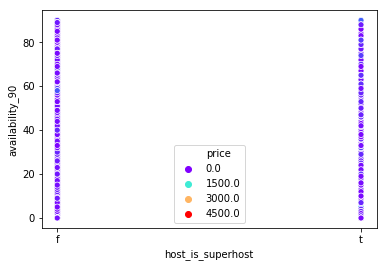

In [47]:
sns.scatterplot(hue=Boston_l['price'],x=Boston_l['host_is_superhost'],y=Boston_l['availability_90'],palette='rainbow')

We found that availability is affected by Superhost feature

Find the correlation between avaibility over month year and quauter with price room type property type bed bedroom no and rating using heatmaps and corr function

In [48]:
Boston_l_ay=Boston_l.sort_values('availability_365')

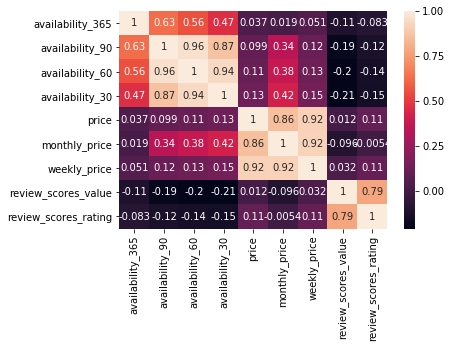

In [49]:
sns.heatmap(
    Boston_l[['availability_365','availability_90','availability_60','availability_30','price','monthly_price',
            'weekly_price','review_scores_value','review_scores_rating']].corr(),annot=True
)

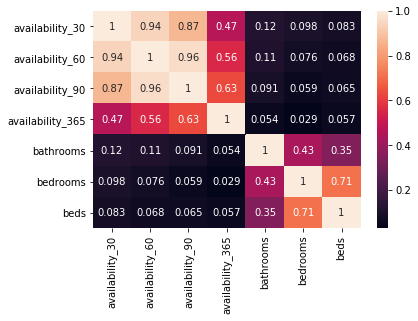

In [50]:
sns.heatmap(Boston_l[['availability_30','availability_60','availability_90',
                    'availability_365','property_type','room_type','bathrooms','bedrooms','beds']].corr(),annot=True)

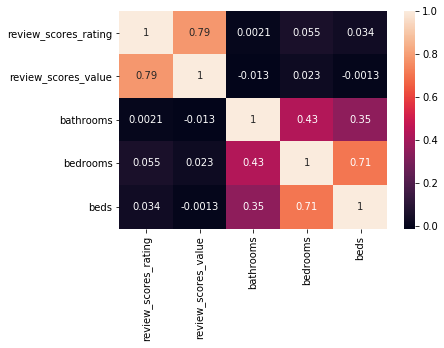

In [51]:
sns.heatmap(Boston_l[['review_scores_rating','review_scores_value', 'property_type',
                    'room_type','bathrooms','bedrooms','beds']].corr(),annot=True)

<a id='eda'></a>
### Answer:

**We found there is relation between availability , review, price and room type and the most significant one is no of bedroom and bathroom 'room type' in price**


###  Question 2:
**What are the most month attract the tourists?**

Find number of the listing over months 

In [52]:
Boston_l[(Boston_l['year']==2016)]['month'].value_counts()

4    75
5    62
6    57
7    56
8    52
1    48
3    39
2    32
9    12
Name: month, dtype: int64

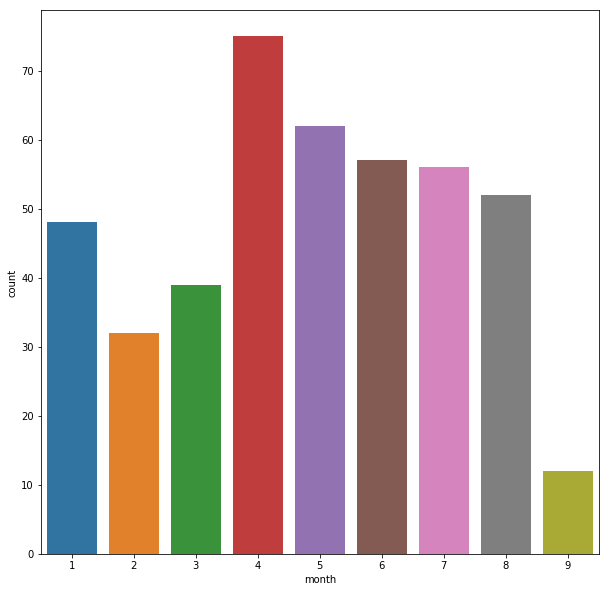

In [53]:
plt.figure(figsize=(10,10))
plt.ylabel('listings_count')
sns.countplot(Boston_l[(Boston_l['year'] == 2016)]['month'])

Find number of customer over months 

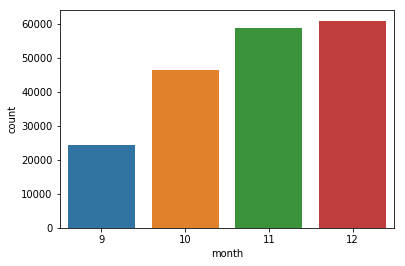

In [54]:
sns.countplot(Boston_c[(Boston_c['year'] == 2016)]['month'])

### Answer :
**As we can see, The most months attract the tourists from April to August.**

###  Question 3:
**What are the most month have lower prices?**

Find the average price over the months

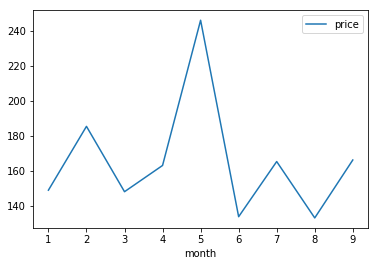

In [55]:
sns.lineplot(data=pd.pivot_table(data=Boston_l[(Boston_l['year'] == 2016)],index='month',values='price',aggfunc='mean'))

### Answer :
**As we can see, There are drop in price in July and August.**

###  Question 4:
**What are the significant factors affect customer' reviews?**

### Review-based datapoints
number_of_reviews
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
reviews_per_month

In [56]:
cols = ['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
       'review_scores_location', 'review_scores_value', 'reviews_per_month']
Boston_l[cols].describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


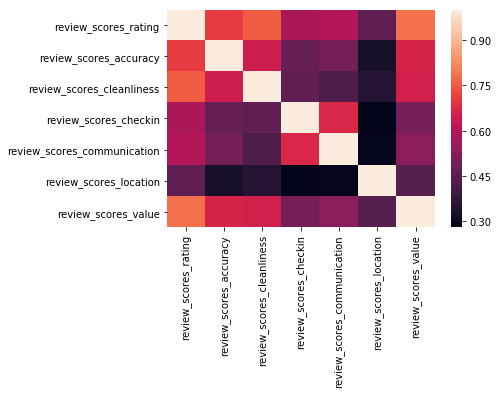

In [57]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value']
df = Boston_l[cols]

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

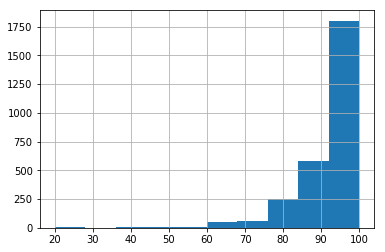

In [58]:
#distribution of values of this column with a histogram plot.
Boston_l['review_scores_rating'].hist()

In [59]:
# look at the top 5 rows of the other review based columns.

cols = ['number_of_reviews', 'first_review', 'last_review', 'reviews_per_month']
Boston_l[cols].head()

,number_of_reviews,first_review,last_review,reviews_per_month
0,0,NaN,NaN,NaN
1,36,2014-06-01,2016-08-13,1.30
2,41,2009-07-19,2016-08-05,0.47
3,1,2016-08-28,2016-08-28,1.00
4,29,2015-08-18,2016-09-01,2.25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000037941390>,
      dtype=object)

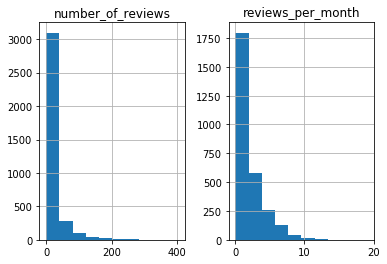

In [60]:
#look at histograms of number_of_reviews and reviews_per_month

Boston_l[['number_of_reviews', 'reviews_per_month']].hist()

C:\Users\Essam\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2878: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003C488E80>,
      dtype=object)

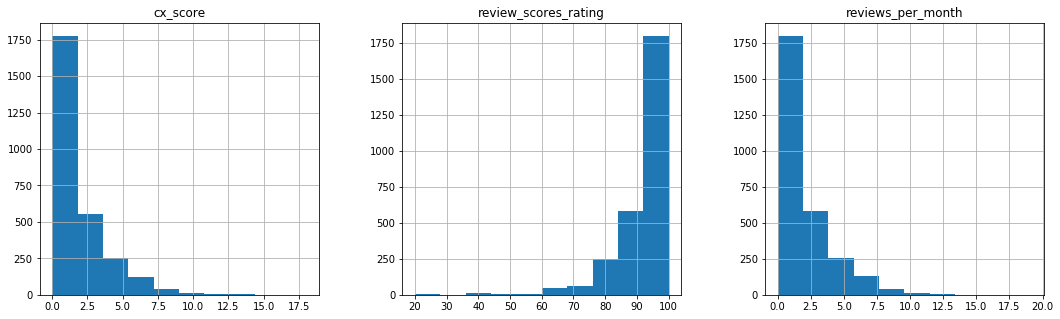

In [61]:
df = Boston_l[['review_scores_rating', 'reviews_per_month']].copy()

df['cx_score'] = df['review_scores_rating'] / 100 * df['reviews_per_month']

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (18,5))
ax = fig.gca()
df.hist(layout=(1,3), ax=ax)

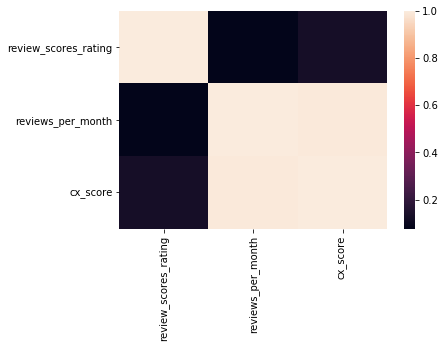

In [62]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Answer :
**As we can see, There is a relationshp between review_scores_rating and reviews_per_month which affect customer' reviews.**

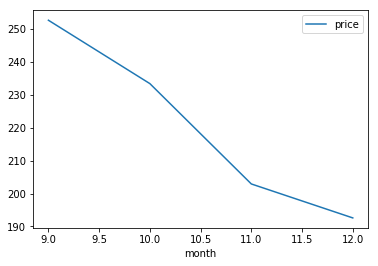

In [63]:
sns.lineplot(data=pd.pivot_table(data=Boston_c[(Boston_c['year'] == 2016)],index='month',values='price',aggfunc='mean'))

We found a drop in price starting from Octoer to December

Find the availability over the months

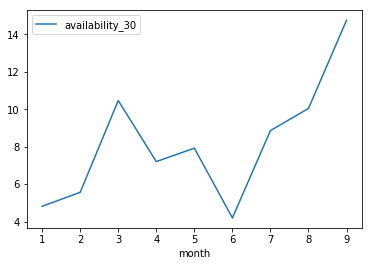

In [64]:
sns.lineplot(data=pd.pivot_table(data=Boston_l[(Boston_l['year'] == 2016)],index='month',values='availability_30',aggfunc='mean'))

We found a drop in availability in January and June and increasing n March and September

<a id='Modeling'></a>

# Data Modeling

**Now, we will apply KNN on dataset**

In [65]:
#Extracting all numeric columns in dataset
Boston_l_1=Boston_l._get_numeric_data()
Boston_l_1.head()

,listing_id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month,month,year
0,12147973,20160906204935,31303940,NaN,1,1,NaN,42.282619,-71.133068,4,1.5,2.0,3.0,NaN,250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,2015
1,3075044,20160906204935,2572247,100.0,1,1,NaN,42.286241,-71.134374,2,1.0,1.0,1.0,NaN,65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,NaN,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,1,1.30,6,2012
2,6976,20160906204935,16701,100.0,1,1,NaN,42.292438,-71.135765,2,1.0,1.0,1.0,NaN,65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,NaN,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,NaN,NaN,1,0.47,5,2009
3,1436513,20160906204935,6031442,100.0,1,1,NaN,42.281106,-71.121021,4,1.0,1.0,2.0,NaN,75.0,NaN,NaN,100.0,50.0,2,25.0,1,1125,NaN,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,1,1.00,4,2013
4,7651065,20160906204935,15396970,100.0,1,1,NaN,42.284512,-71.136258,2,1.5,1.0,2.0,NaN,79.0,NaN,NaN,NaN,15.0,1,0.0,2,31,NaN,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,NaN,1,2.25,5,2014


In [66]:
Boston_l.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,month,year
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN,4,2015
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100.0,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston,

In [67]:
#Removing NaN values
Boston_l_1=Boston_l_1.drop(['square_feet','license'],axis=1)

In [68]:
Boston_l_1=Boston_l_1.dropna(axis=1)

In [69]:
Boston_l_1=Boston_l_1.drop(['latitude','longitude'],axis=1)

In [70]:
#Ready Data for Use
Boston_l_1.head()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count,month,year
0,12147973,20160906204935,31303940,1,1,4,250.0,1,0.0,2,1125,0,0,0,0,0,1,4,2015
1,3075044,20160906204935,2572247,1,1,2,65.0,0,0.0,2,15,26,54,84,359,36,1,6,2012
2,6976,20160906204935,16701,1,1,2,65.0,1,20.0,3,45,19,46,61,319,41,1,5,2009
3,1436513,20160906204935,6031442,1,1,4,75.0,2,25.0,1,1125,6,16,26,98,1,1,4,2013
4,7651065,20160906204935,15396970,1,1,2,79.0,1,0.0,2,31,13,34,59,334,29,1,5,2014


In [71]:
#From KNN algo Steps:

#We Divide the dataset into train and test. With test size of 40% of dataset.
from sklearn.model_selection import train_test_split
x=Boston_l_1.iloc[:,5:10]
y=Boston_l_1['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [72]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(pred)

[225.  250.  149.  ... 650.6  99.4 229. ]


In [73]:
#Writing a Manual KNN Function
#Steps:

#Defining a Train Funtion.
def train(x_train,y_train):
    return
#Defining a Predict Function.

#In this funtion we calculate the nearest distance and get the corresponding value for value of K 
#and get nearest neighbors value means for more accuracy in predicted value.

def predic(x_train,y_train,x_test,k):
    distance=[]
    target=[]
    p=0
    for i in range(len(x_train)):
        dis=np.sqrt(np.sum(np.square(x_test-x_train.values[i])))
        distance.append([dis,y_train.values[i]])
        distance=sorted(distance)
    for i in range(k):
        p=p+distance[i][1]
    return(p/k)
#Predicting the value for Target Variable for value of K.
ppp=[]
def KNN(x_train,y_train,x_test,pred,k):
    if k>len(x_train):
        raise ValueError
    
    train(x_train,y_train)
    for i in range(len(x_test)):
        print("K   ",k)
        print(x_test.iloc[i,:])
        p=predic(x_train,y_train,x_test.iloc[i,:],k)
        ppp.append(p)
        print("Predicted Price = $",p)


In [74]:
#Finally Calling the above function by passing a certain value of K.And apply a try and except 
#case beacuse the value of K cannot be larger then number of training values.
prediction=[]
try:
    KNN(x_train,y_train,x_test,prediction,3)
except ValueError:
    print("Value of K cannot be more then the number of training values")

('K   ', 3)
accommodates         2.0
price              225.0
guests_included      1.0
extra_people         0.0
minimum_nights       7.0
Name: 1155, dtype: float64
('Predicted Price = $', 225.0)
('K   ', 3)
accommodates         4.0
price              250.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2056, dtype: float64
('Predicted Price = $', 250.0)
('K   ', 3)
accommodates         4.0
price              145.0
guests_included      3.0
extra_people        33.0
minimum_nights       5.0
Name: 44, dtype: float64
('Predicted Price = $', 150.0)
('K   ', 3)
accommodates        2.0
price              67.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 2415, dtype: float64
('Predicted Price = $', 67.66666666666667)
('K   ', 3)
accommodates         4.0
price              150.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 491, dtype: float64
('Predicted Price = $', 150.0)
('K   ', 3)
accommoda

('Predicted Price = $', 100.0)
('K   ', 3)
accommodates         3.0
price              175.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 2122, dtype: float64
('Predicted Price = $', 175.0)
('K   ', 3)
accommodates        2.0
price              63.0
guests_included     1.0
extra_people       25.0
minimum_nights      7.0
Name: 2458, dtype: float64
('Predicted Price = $', 63.333333333333336)
('K   ', 3)
accommodates         2.0
price              189.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1134, dtype: float64
('Predicted Price = $', 189.33333333333334)
('K   ', 3)
accommodates        2.0
price              69.0
guests_included     2.0
extra_people       20.0
minimum_nights      1.0
Name: 2883, dtype: float64
('Predicted Price = $', 68.66666666666667)
('K   ', 3)
accommodates        1.0
price              27.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 84, dtype: float64
('Pr

('Predicted Price = $', 275.0)
('K   ', 3)
accommodates         2.0
price              105.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2714, dtype: float64
('Predicted Price = $', 104.66666666666667)
('K   ', 3)
accommodates         4.0
price              229.0
guests_included      2.0
extra_people        25.0
minimum_nights       3.0
Name: 1425, dtype: float64
('Predicted Price = $', 227.33333333333334)
('K   ', 3)
accommodates         2.0
price              295.0
guests_included      0.0
extra_people         0.0
minimum_nights       2.0
Name: 3067, dtype: float64
('Predicted Price = $', 297.0)
('K   ', 3)
accommodates         4.0
price              300.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2174, dtype: float64
('Predicted Price = $', 300.0)
('K   ', 3)
accommodates         3.0
price              100.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1444, dtype: float64

('Predicted Price = $', 229.0)
('K   ', 3)
accommodates        2.0
price              75.0
guests_included     1.0
extra_people       25.0
minimum_nights      1.0
Name: 3310, dtype: float64
('Predicted Price = $', 75.0)
('K   ', 3)
accommodates         4.0
price              130.0
guests_included      3.0
extra_people        25.0
minimum_nights       3.0
Name: 2556, dtype: float64
('Predicted Price = $', 127.33333333333333)
('K   ', 3)
accommodates         4.0
price              400.0
guests_included      3.0
extra_people       100.0
minimum_nights       1.0
Name: 537, dtype: float64
('Predicted Price = $', 413.0)
('K   ', 3)
accommodates        2.0
price              55.0
guests_included     1.0
extra_people        0.0
minimum_nights      2.0
Name: 2721, dtype: float64
('Predicted Price = $', 55.0)
('K   ', 3)
accommodates         2.0
price              185.0
guests_included      1.0
extra_people        25.0
minimum_nights       3.0
Name: 971, dtype: float64
('Predicted Price = $', 18

('Predicted Price = $', 60.0)
('K   ', 3)
accommodates        1.0
price              40.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 1407, dtype: float64
('Predicted Price = $', 40.0)
('K   ', 3)
accommodates         4.0
price              500.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 533, dtype: float64
('Predicted Price = $', 500.0)
('K   ', 3)
accommodates         4.0
price              160.0
guests_included      4.0
extra_people        15.0
minimum_nights       1.0
Name: 272, dtype: float64
('Predicted Price = $', 159.66666666666666)
('K   ', 3)
accommodates         4.0
price              281.0
guests_included      0.0
extra_people         0.0
minimum_nights       4.0
Name: 1451, dtype: float64
('Predicted Price = $', 279.0)
('K   ', 3)
accommodates         2.0
price              110.0
guests_included      2.0
extra_people         0.0
minimum_nights       2.0
Name: 2527, dtype: float64
('Predicted Price = $

('Predicted Price = $', 88.66666666666667)
('K   ', 3)
accommodates        10.0
price              199.0
guests_included      5.0
extra_people        15.0
minimum_nights       1.0
Name: 3181, dtype: float64
('Predicted Price = $', 199.66666666666666)
('K   ', 3)
accommodates        2.0
price              80.0
guests_included     1.0
extra_people       10.0
minimum_nights      1.0
Name: 3013, dtype: float64
('Predicted Price = $', 79.66666666666667)
('K   ', 3)
accommodates        1.0
price              90.0
guests_included     1.0
extra_people        0.0
minimum_nights      3.0
Name: 2233, dtype: float64
('Predicted Price = $', 89.66666666666667)
('K   ', 3)
accommodates         4.0
price              250.0
guests_included      1.0
extra_people         0.0
minimum_nights       4.0
Name: 2068, dtype: float64
('Predicted Price = $', 249.33333333333334)
('K   ', 3)
accommodates         2.0
price              139.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0


('Predicted Price = $', 169.0)
('K   ', 3)
accommodates         6.0
price              130.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2633, dtype: float64
('Predicted Price = $', 129.66666666666666)
('K   ', 3)
accommodates         4.0
price              200.0
guests_included      2.0
extra_people        50.0
minimum_nights       3.0
Name: 1374, dtype: float64
('Predicted Price = $', 199.66666666666666)
('K   ', 3)
accommodates         3.0
price              169.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 2114, dtype: float64
('Predicted Price = $', 169.0)
('K   ', 3)
accommodates         3.0
price              159.0
guests_included      2.0
extra_people        30.0
minimum_nights       1.0
Name: 657, dtype: float64
('Predicted Price = $', 159.33333333333334)
('K   ', 3)
accommodates         3.0
price              200.0
guests_included      1.0
extra_people         0.0
minimum_nights       5.0
Name: 1385, dt

('Predicted Price = $', 299.6666666666667)
('K   ', 3)
accommodates         2.0
price              175.0
guests_included      2.0
extra_people         0.0
minimum_nights       4.0
Name: 1959, dtype: float64
('Predicted Price = $', 175.0)
('K   ', 3)
accommodates         2.0
price              100.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 498, dtype: float64
('Predicted Price = $', 100.0)
('K   ', 3)
accommodates        2.0
price              99.0
guests_included     1.0
extra_people        0.0
minimum_nights      2.0
Name: 1202, dtype: float64
('Predicted Price = $', 99.0)
('K   ', 3)
accommodates         3.0
price              249.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 2426, dtype: float64
('Predicted Price = $', 249.0)
('K   ', 3)
accommodates         2.0
price              479.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1322, dtype: float64
('Predicted Price = 

('Predicted Price = $', 48.666666666666664)
('K   ', 3)
accommodates        2.0
price              79.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 412, dtype: float64
('Predicted Price = $', 79.0)
('K   ', 3)
accommodates         6.0
price              192.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2281, dtype: float64
('Predicted Price = $', 192.66666666666666)
('K   ', 3)
accommodates        2.0
price              79.0
guests_included     1.0
extra_people       20.0
minimum_nights      2.0
Name: 3362, dtype: float64
('Predicted Price = $', 79.0)
('K   ', 3)
accommodates         1.0
price              100.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 2344, dtype: float64
('Predicted Price = $', 100.0)
('K   ', 3)
accommodates        2.0
price              90.0
guests_included     1.0
extra_people       30.0
minimum_nights      4.0
Name: 775, dtype: float64
('Predicted Price 

('Predicted Price = $', 180.66666666666666)
('K   ', 3)
accommodates         6.0
price              450.0
guests_included      2.0
extra_people        25.0
minimum_nights       1.0
Name: 1094, dtype: float64
('Predicted Price = $', 442.6666666666667)
('K   ', 3)
accommodates         4.0
price              300.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1352, dtype: float64
('Predicted Price = $', 299.3333333333333)
('K   ', 3)
accommodates        2.0
price              90.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 3278, dtype: float64
('Predicted Price = $', 90.0)
('K   ', 3)
accommodates         4.0
price              235.0
guests_included      4.0
extra_people       100.0
minimum_nights       3.0
Name: 764, dtype: float64
('Predicted Price = $', 226.33333333333334)
('K   ', 3)
accommodates         2.0
price              105.0
guests_included      1.0
extra_people         0.0
minimum_nights       4.0
Name: 136

('Predicted Price = $', 189.0)
('K   ', 3)
accommodates        2.0
price              90.0
guests_included     1.0
extra_people       30.0
minimum_nights      2.0
Name: 817, dtype: float64
('Predicted Price = $', 90.66666666666667)
('K   ', 3)
accommodates         4.0
price              325.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1949, dtype: float64
('Predicted Price = $', 325.0)
('K   ', 3)
accommodates         4.0
price              500.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1984, dtype: float64
('Predicted Price = $', 500.0)
('K   ', 3)
accommodates        2.0
price              75.0
guests_included     1.0
extra_people        0.0
minimum_nights      5.0
Name: 3122, dtype: float64
('Predicted Price = $', 75.66666666666667)
('K   ', 3)
accommodates        2.0
price              75.0
guests_included     1.0
extra_people       15.0
minimum_nights      1.0
Name: 1658, dtype: float64
('Predicted Price

('Predicted Price = $', 76.0)
('K   ', 3)
accommodates         4.0
price              500.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2373, dtype: float64
('Predicted Price = $', 500.0)
('K   ', 3)
accommodates         3.0
price              189.0
guests_included      2.0
extra_people        25.0
minimum_nights       3.0
Name: 3332, dtype: float64
('Predicted Price = $', 189.33333333333334)
('K   ', 3)
accommodates         2.0
price              200.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 2423, dtype: float64
('Predicted Price = $', 199.66666666666666)
('K   ', 3)
accommodates        1.0
price              45.0
guests_included     1.0
extra_people        0.0
minimum_nights      2.0
Name: 2817, dtype: float64
('Predicted Price = $', 45.0)
('K   ', 3)
accommodates         2.0
price              130.0
guests_included      1.0
extra_people       100.0
minimum_nights       1.0
Name: 3375, dtype: float64
('Pred

('Predicted Price = $', 79.0)
('K   ', 3)
accommodates         8.0
price              350.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 844, dtype: float64
('Predicted Price = $', 349.3333333333333)
('K   ', 3)
accommodates        1.0
price              50.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 2464, dtype: float64
('Predicted Price = $', 50.0)
('K   ', 3)
accommodates        2.0
price              54.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 306, dtype: float64
('Predicted Price = $', 55.0)
('K   ', 3)
accommodates         1.0
price              100.0
guests_included      1.0
extra_people         0.0
minimum_nights      30.0
Name: 966, dtype: float64
('Predicted Price = $', 97.66666666666667)
('K   ', 3)
accommodates        1.0
price              56.0
guests_included     1.0
extra_people        0.0
minimum_nights      5.0
Name: 2662, dtype: float64
('Predicted Price = $'

('Predicted Price = $', 200.0)
('K   ', 3)
accommodates         2.0
price              105.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1594, dtype: float64
('Predicted Price = $', 104.66666666666667)
('K   ', 3)
accommodates         5.0
price              319.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 2421, dtype: float64
('Predicted Price = $', 319.0)
('K   ', 3)
accommodates        10.0
price              375.0
guests_included      2.0
extra_people        37.0
minimum_nights       2.0
Name: 628, dtype: float64
('Predicted Price = $', 375.0)
('K   ', 3)
accommodates         2.0
price              229.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 920, dtype: float64
('Predicted Price = $', 229.0)
('K   ', 3)
accommodates        1.0
price              60.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 15, dtype: float64
('Predicted Price = $

('Predicted Price = $', 319.0)
('K   ', 3)
accommodates         2.0
price              135.0
guests_included      2.0
extra_people        15.0
minimum_nights       2.0
Name: 756, dtype: float64
('Predicted Price = $', 136.33333333333334)
('K   ', 3)
accommodates         2.0
price              150.0
guests_included      2.0
extra_people         0.0
minimum_nights      30.0
Name: 1833, dtype: float64
('Predicted Price = $', 150.33333333333334)
('K   ', 3)
accommodates         2.0
price              260.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 2303, dtype: float64
('Predicted Price = $', 259.0)
('K   ', 3)
accommodates        2.0
price              75.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 850, dtype: float64
('Predicted Price = $', 75.0)
('K   ', 3)
accommodates        2.0
price              99.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 812, dtype: float64
('Predicted P

('Predicted Price = $', 99.0)
('K   ', 3)
accommodates        2.0
price              68.0
guests_included     1.0
extra_people       15.0
minimum_nights      1.0
Name: 2585, dtype: float64
('Predicted Price = $', 67.66666666666667)
('K   ', 3)
accommodates         4.0
price              239.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 3509, dtype: float64
('Predicted Price = $', 239.33333333333334)
('K   ', 3)
accommodates         2.0
price              250.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1220, dtype: float64
('Predicted Price = $', 250.0)
('K   ', 3)
accommodates         4.0
price              285.0
guests_included      4.0
extra_people         0.0
minimum_nights       2.0
Name: 2094, dtype: float64
('Predicted Price = $', 285.0)
('K   ', 3)
accommodates         5.0
price              199.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 586, dtype: float64
('Predi

('Predicted Price = $', 99.33333333333333)
('K   ', 3)
accommodates         3.0
price              169.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 2436, dtype: float64
('Predicted Price = $', 169.0)
('K   ', 3)
accommodates         1.0
price              100.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 633, dtype: float64
('Predicted Price = $', 100.0)
('K   ', 3)
accommodates         4.0
price              300.0
guests_included      4.0
extra_people        25.0
minimum_nights       2.0
Name: 1500, dtype: float64
('Predicted Price = $', 299.6666666666667)
('K   ', 3)
accommodates         5.0
price              135.0
guests_included      5.0
extra_people        50.0
minimum_nights      60.0
Name: 2635, dtype: float64
('Predicted Price = $', 150.0)
('K   ', 3)
accommodates        2.0
price              89.0
guests_included     1.0
extra_people       20.0
minimum_nights      1.0
Name: 2663, dtype: float64
('Predi

('Predicted Price = $', 1307.3333333333333)
('K   ', 3)
accommodates         6.0
price              195.0
guests_included      3.0
extra_people        25.0
minimum_nights       4.0
Name: 116, dtype: float64
('Predicted Price = $', 195.66666666666666)
('K   ', 3)
accommodates        1.0
price              35.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 3376, dtype: float64
('Predicted Price = $', 35.0)
('K   ', 3)
accommodates         2.0
price              100.0
guests_included      1.0
extra_people        10.0
minimum_nights       2.0
Name: 3270, dtype: float64
('Predicted Price = $', 99.33333333333333)
('K   ', 3)
accommodates         2.0
price              170.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2411, dtype: float64
('Predicted Price = $', 169.66666666666666)
('K   ', 3)
accommodates        1.0
price              39.0
guests_included     1.0
extra_people       20.0
minimum_nights      1.0
Name: 3555, d

('Predicted Price = $', 116.66666666666667)
('K   ', 3)
accommodates        4.0
price              80.0
guests_included     2.0
extra_people       40.0
minimum_nights      1.0
Name: 2406, dtype: float64
('Predicted Price = $', 78.33333333333333)
('K   ', 3)
accommodates         2.0
price              159.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 576, dtype: float64
('Predicted Price = $', 159.0)
('K   ', 3)
accommodates        2.0
price              80.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 935, dtype: float64
('Predicted Price = $', 80.0)
('K   ', 3)
accommodates        1.0
price              57.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 3210, dtype: float64
('Predicted Price = $', 57.0)
('K   ', 3)
accommodates        2.0
price              50.0
guests_included     1.0
extra_people        0.0
minimum_nights      3.0
Name: 3408, dtype: float64
('Predicted Price = $', 

('Predicted Price = $', 125.0)
('K   ', 3)
accommodates         3.0
price              295.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 3383, dtype: float64
('Predicted Price = $', 296.0)
('K   ', 3)
accommodates         2.0
price              150.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 766, dtype: float64
('Predicted Price = $', 150.0)
('K   ', 3)
accommodates        5.0
price              55.0
guests_included     1.0
extra_people       20.0
minimum_nights      1.0
Name: 2680, dtype: float64
('Predicted Price = $', 56.666666666666664)
('K   ', 3)
accommodates         2.0
price              275.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1335, dtype: float64
('Predicted Price = $', 275.0)
('K   ', 3)
accommodates        4.0
price              99.0
guests_included     1.0
extra_people        0.0
minimum_nights      2.0
Name: 1555, dtype: float64
('Predicted Price = $',

('Predicted Price = $', 99.0)
('K   ', 3)
accommodates        2.0
price              85.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 2658, dtype: float64
('Predicted Price = $', 85.0)
('K   ', 3)
accommodates         2.0
price              128.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1571, dtype: float64
('Predicted Price = $', 129.0)
('K   ', 3)
accommodates        1.0
price              65.0
guests_included     1.0
extra_people       20.0
minimum_nights      1.0
Name: 2787, dtype: float64
('Predicted Price = $', 65.0)
('K   ', 3)
accommodates         6.0
price              769.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1854, dtype: float64
('Predicted Price = $', 766.6666666666666)
('K   ', 3)
accommodates         6.0
price              120.0
guests_included      4.0
extra_people        44.0
minimum_nights       1.0
Name: 841, dtype: float64
('Predicted Price = $', 116

('Predicted Price = $', 99.33333333333333)
('K   ', 3)
accommodates        10.0
price              500.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 328, dtype: float64
('Predicted Price = $', 500.0)
('K   ', 3)
accommodates        2.0
price              75.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 857, dtype: float64
('Predicted Price = $', 75.0)
('K   ', 3)
accommodates        4.0
price              99.0
guests_included     1.0
extra_people        0.0
minimum_nights      2.0
Name: 1646, dtype: float64
('Predicted Price = $', 99.0)
('K   ', 3)
accommodates         2.0
price              170.0
guests_included      2.0
extra_people         0.0
minimum_nights       4.0
Name: 1116, dtype: float64
('Predicted Price = $', 169.33333333333334)
('K   ', 3)
accommodates         2.0
price              164.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 995, dtype: float64
('Predicted Pri

('Predicted Price = $', 375.0)
('K   ', 3)
accommodates        2.0
price              73.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 75, dtype: float64
('Predicted Price = $', 73.33333333333333)
('K   ', 3)
accommodates        2.0
price              80.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 1590, dtype: float64
('Predicted Price = $', 80.0)
('K   ', 3)
accommodates        2.0
price              45.0
guests_included     1.0
extra_people       10.0
minimum_nights      2.0
Name: 45, dtype: float64
('Predicted Price = $', 49.0)
('K   ', 3)
accommodates        10.0
price              450.0
guests_included      6.0
extra_people        20.0
minimum_nights       4.0
Name: 884, dtype: float64
('Predicted Price = $', 450.0)
('K   ', 3)
accommodates         8.0
price              300.0
guests_included      2.0
extra_people        25.0
minimum_nights       3.0
Name: 279, dtype: float64
('Predicted Price = $', 299.66666666

('Predicted Price = $', 50.0)
('K   ', 3)
accommodates         2.0
price              120.0
guests_included      1.0
extra_people        20.0
minimum_nights       6.0
Name: 3301, dtype: float64
('Predicted Price = $', 120.0)
('K   ', 3)
accommodates         5.0
price              349.0
guests_included      1.0
extra_people         0.0
minimum_nights       5.0
Name: 1759, dtype: float64
('Predicted Price = $', 349.3333333333333)
('K   ', 3)
accommodates         4.0
price              199.0
guests_included      1.0
extra_people         0.0
minimum_nights       4.0
Name: 1899, dtype: float64
('Predicted Price = $', 199.33333333333334)
('K   ', 3)
accommodates        3.0
price              65.0
guests_included     1.0
extra_people       15.0
minimum_nights      1.0
Name: 2793, dtype: float64
('Predicted Price = $', 65.0)
('K   ', 3)
accommodates         6.0
price              250.0
guests_included      1.0
extra_people        20.0
minimum_nights       1.0
Name: 341, dtype: float64
('Predic

('Predicted Price = $', 375.0)
('K   ', 3)
accommodates         7.0
price              225.0
guests_included      4.0
extra_people        25.0
minimum_nights       2.0
Name: 3290, dtype: float64
('Predicted Price = $', 225.0)
('K   ', 3)
accommodates        1.0
price              60.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 3176, dtype: float64
('Predicted Price = $', 60.0)
('K   ', 3)
accommodates         2.0
price              120.0
guests_included      1.0
extra_people         0.0
minimum_nights       7.0
Name: 915, dtype: float64
('Predicted Price = $', 119.66666666666667)
('K   ', 3)
accommodates         4.0
price              315.0
guests_included      1.0
extra_people         0.0
minimum_nights      10.0
Name: 2322, dtype: float64
('Predicted Price = $', 314.6666666666667)
('K   ', 3)
accommodates        1.0
price              29.0
guests_included     1.0
extra_people        0.0
minimum_nights     10.0
Name: 3029, dtype: float64
('Predicted 

('Predicted Price = $', 250.0)
('K   ', 3)
accommodates         4.0
price              219.0
guests_included      2.0
extra_people        25.0
minimum_nights       3.0
Name: 1828, dtype: float64
('Predicted Price = $', 218.33333333333334)
('K   ', 3)
accommodates         3.0
price              120.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 1459, dtype: float64
('Predicted Price = $', 120.0)
('K   ', 3)
accommodates        2.0
price              80.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 2734, dtype: float64
('Predicted Price = $', 80.0)
('K   ', 3)
accommodates         7.0
price              105.0
guests_included      3.0
extra_people        50.0
minimum_nights       3.0
Name: 1353, dtype: float64
('Predicted Price = $', 99.66666666666667)
('K   ', 3)
accommodates        1.0
price              70.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 2320, dtype: float64
('Predicted

('Predicted Price = $', 150.0)
('K   ', 3)
accommodates         3.0
price              135.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 678, dtype: float64
('Predicted Price = $', 135.0)
('K   ', 3)
accommodates         7.0
price              695.0
guests_included      4.0
extra_people        25.0
minimum_nights       3.0
Name: 1280, dtype: float64
('Predicted Price = $', 696.6666666666666)
('K   ', 3)
accommodates         4.0
price              159.0
guests_included      4.0
extra_people         0.0
minimum_nights       2.0
Name: 322, dtype: float64
('Predicted Price = $', 159.33333333333334)
('K   ', 3)
accommodates         4.0
price              190.0
guests_included      2.0
extra_people        30.0
minimum_nights       2.0
Name: 1037, dtype: float64
('Predicted Price = $', 189.33333333333334)
('K   ', 3)
accommodates         2.0
price              200.0
guests_included      0.0
extra_people         0.0
minimum_nights       1.0
Name: 723, dtype

('Predicted Price = $', 165.0)
('K   ', 3)
accommodates         6.0
price              290.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 3260, dtype: float64
('Predicted Price = $', 288.6666666666667)
('K   ', 3)
accommodates         2.0
price              275.0
guests_included      1.0
extra_people        50.0
minimum_nights       3.0
Name: 1490, dtype: float64
('Predicted Price = $', 277.0)
('K   ', 3)
accommodates         7.0
price              500.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2041, dtype: float64
('Predicted Price = $', 500.0)
('K   ', 3)
accommodates         3.0
price              219.0
guests_included      1.0
extra_people         0.0
minimum_nights      15.0
Name: 608, dtype: float64
('Predicted Price = $', 219.0)
('K   ', 3)
accommodates         4.0
price              125.0
guests_included      1.0
extra_people        25.0
minimum_nights       1.0
Name: 3452, dtype: float64
('Predicted Pr

('Predicted Price = $', 69.33333333333333)
('K   ', 3)
accommodates         2.0
price              197.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1928, dtype: float64
('Predicted Price = $', 197.0)
('K   ', 3)
accommodates         2.0
price              145.0
guests_included      1.0
extra_people         0.0
minimum_nights       7.0
Name: 1936, dtype: float64
('Predicted Price = $', 147.66666666666666)
('K   ', 3)
accommodates        1.0
price              76.0
guests_included     1.0
extra_people        0.0
minimum_nights      2.0
Name: 3022, dtype: float64
('Predicted Price = $', 75.33333333333333)
('K   ', 3)
accommodates         4.0
price              200.0
guests_included      1.0
extra_people        50.0
minimum_nights       1.0
Name: 3569, dtype: float64
('Predicted Price = $', 200.0)
('K   ', 3)
accommodates         8.0
price              334.0
guests_included      4.0
extra_people        60.0
minimum_nights       1.0
Name: 2047, dtype: f

('Predicted Price = $', 200.0)
('K   ', 3)
accommodates         2.0
price              239.0
guests_included      1.0
extra_people         5.0
minimum_nights       2.0
Name: 402, dtype: float64
('Predicted Price = $', 238.66666666666666)
('K   ', 3)
accommodates         3.0
price              250.0
guests_included      2.0
extra_people        20.0
minimum_nights       3.0
Name: 584, dtype: float64
('Predicted Price = $', 249.33333333333334)
('K   ', 3)
accommodates         3.0
price              150.0
guests_included      2.0
extra_people        15.0
minimum_nights       1.0
Name: 693, dtype: float64
('Predicted Price = $', 150.0)
('K   ', 3)
accommodates         6.0
price              389.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 1258, dtype: float64
('Predicted Price = $', 386.0)
('K   ', 3)
accommodates         6.0
price              300.0
guests_included      4.0
extra_people        15.0
minimum_nights       1.0
Name: 1618, dtype: float64
('

('Predicted Price = $', 99.0)
('K   ', 3)
accommodates         2.0
price              220.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 2351, dtype: float64
('Predicted Price = $', 219.66666666666666)
('K   ', 3)
accommodates        2.0
price              65.0
guests_included     1.0
extra_people        0.0
minimum_nights      8.0
Name: 1673, dtype: float64
('Predicted Price = $', 65.0)
('K   ', 3)
accommodates         6.0
price              144.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 2893, dtype: float64
('Predicted Price = $', 145.33333333333334)
('K   ', 3)
accommodates         4.0
price              600.0
guests_included      4.0
extra_people        50.0
minimum_nights       2.0
Name: 2192, dtype: float64
('Predicted Price = $', 600.0)
('K   ', 3)
accommodates         2.0
price              300.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1731, dtype: float64
('Pred

('Predicted Price = $', 131.66666666666666)
('K   ', 3)
accommodates         2.0
price              175.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 761, dtype: float64
('Predicted Price = $', 175.0)
('K   ', 3)
accommodates         4.0
price              220.0
guests_included      1.0
extra_people        25.0
minimum_nights       1.0
Name: 1216, dtype: float64
('Predicted Price = $', 221.66666666666666)
('K   ', 3)
accommodates        2.0
price              95.0
guests_included     1.0
extra_people       10.0
minimum_nights      2.0
Name: 101, dtype: float64
('Predicted Price = $', 95.66666666666667)
('K   ', 3)
accommodates         2.0
price              349.0
guests_included      1.0
extra_people         0.0
minimum_nights       3.0
Name: 585, dtype: float64
('Predicted Price = $', 349.0)
('K   ', 3)
accommodates        2.0
price              65.0
guests_included     1.0
extra_people        0.0
minimum_nights      5.0
Name: 184, dtype: float64
(

('Predicted Price = $', 150.0)
('K   ', 3)
accommodates         3.0
price              140.0
guests_included      2.0
extra_people       120.0
minimum_nights       4.0
Name: 473, dtype: float64
('Predicted Price = $', 133.33333333333334)
('K   ', 3)
accommodates        2.0
price              81.0
guests_included     1.0
extra_people       25.0
minimum_nights      1.0
Name: 369, dtype: float64
('Predicted Price = $', 79.0)
('K   ', 3)
accommodates        1.0
price              45.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 3347, dtype: float64
('Predicted Price = $', 45.0)
('K   ', 3)
accommodates         2.0
price              245.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 3114, dtype: float64
('Predicted Price = $', 248.0)
('K   ', 3)
accommodates         4.0
price              250.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 0, dtype: float64
('Predicted Price = $', 250.0

('Predicted Price = $', 225.0)
('K   ', 3)
accommodates         2.0
price              195.0
guests_included      1.0
extra_people        25.0
minimum_nights       1.0
Name: 3200, dtype: float64
('Predicted Price = $', 199.0)
('K   ', 3)
accommodates        4.0
price              80.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 2667, dtype: float64
('Predicted Price = $', 80.0)
('K   ', 3)
accommodates         2.0
price              190.0
guests_included      2.0
extra_people        20.0
minimum_nights       1.0
Name: 1365, dtype: float64
('Predicted Price = $', 191.33333333333334)
('K   ', 3)
accommodates         2.0
price              150.0
guests_included      1.0
extra_people         0.0
minimum_nights       2.0
Name: 1348, dtype: float64
('Predicted Price = $', 150.0)
('K   ', 3)
accommodates         3.0
price              350.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1092, dtype: float64
('Predicted Price 

('Predicted Price = $', 124.66666666666667)
('K   ', 3)
accommodates         4.0
price              385.0
guests_included      1.0
extra_people         0.0
minimum_nights       5.0
Name: 1330, dtype: float64
('Predicted Price = $', 386.0)
('K   ', 3)
accommodates        2.0
price              85.0
guests_included     1.0
extra_people        0.0
minimum_nights      3.0
Name: 2490, dtype: float64
('Predicted Price = $', 84.66666666666667)
('K   ', 3)
accommodates         2.0
price              149.0
guests_included      1.0
extra_people         0.0
minimum_nights       1.0
Name: 1744, dtype: float64
('Predicted Price = $', 149.0)
('K   ', 3)
accommodates        1.0
price              89.0
guests_included     1.0
extra_people        0.0
minimum_nights      1.0
Name: 3183, dtype: float64
('Predicted Price = $', 90.0)
('K   ', 3)
accommodates         4.0
price              190.0
guests_included      2.0
extra_people        15.0
minimum_nights       4.0
Name: 93, dtype: float64
('Predicted P

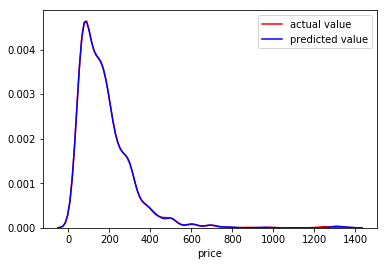

In [75]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(ppp,hist=False,color='blue',label='predicted value')

In the above graph we Examine Our Model Accuracy as by ploting a Distribution Curve of "Price" for Actual Value and the Predicted Value.

From the above graph we can conclude that our Predicted Value follow almost the same trend as Followed by Actual Value. As a result we can say that our Model Accuracy Is Somehow Good.

<a id='Evaluation'></a>

# Data Modeling, Evaluation

**Prediction using Linear Regression**

Linear Regression is a Linear approch for modeling the relationship between Target Variable(Dependent Variable) and Other Variables(Independent Variable)

In [76]:
len(ppp)

1434

In [81]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=Boston_l_1.iloc[:,5:10]
y=Boston_l_1[['price']]
Y=lm.fit(x,y)
lm.coef_
for i in range(len(x.columns)):
    print(x.columns[i],'\t ',lm.coef_[0][i])

('accommodates', '\t ', 1.6582821811889346e-14)
('price', '\t ', 0.9999999999999991)
('guests_included', '\t ', -1.81177739153259e-15)
('extra_people', '\t ', -2.3408780501157865e-17)
('minimum_nights', '\t ', -6.16964643517388e-17)


Text(0,0.5,'Bathrooms and Bedrooms')

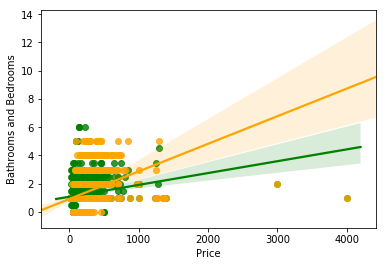

In [79]:
sns.regplot(y=Boston_l['bathrooms'],x=Boston_l_1['price'],color='green')
sns.regplot(y=Boston_l['bedrooms'],x=Boston_l_1['price'],color='orange')
plt.xlabel("Price")
plt.ylabel("Bathrooms and Bedrooms")

### As we can notes,
we found that Beadroom is the most important variable for predicting price in this case.

<a id='conclusions'></a>
## Conclusions:




Conclusions that there is a relationship between availability , review, price and room type but the most significant one is number of bedrooms and bathrooms 'room type' in price.Moreover, the most months attract the tourists are from April to August. on the other hand, there are markable drop in price on July and August. On customers reviews, there is a relationshp between review_scores_rating and reviews_per_month which affect customer' reviews.

<a id='conclusions'></a>
## Resources


1- https://www.kaggle.com/airbnb/boston

2- https://www.kaggle.com/aashirwad01/airbnb-analysis#Result-and-Conclusion

3- https://www.kaggle.com/commit/understanding-customer-experience/notebook

4- https://www.kaggle.com/yaginun/crisp-dm-process-on-the-airbnb-dataset#Business-Understanding
